# Excavator use-case 7: cost and makespan optimization

Solver type:
	-> Builtin z3 Optimize solver
Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.02s
MakeSpan Value :  3
MinimizeObjective_4794ecb8 Value :  45


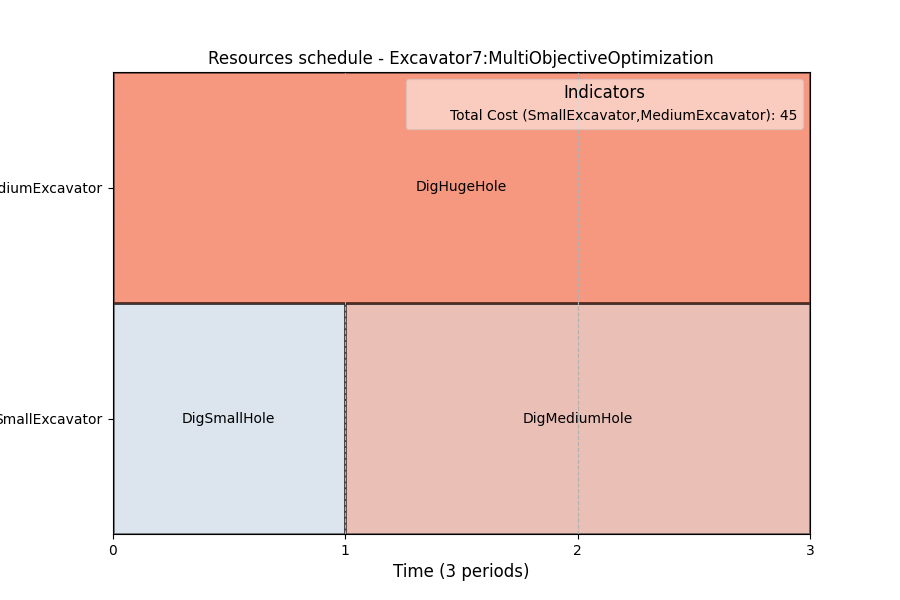

In [5]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem('Excavator7:MultiObjectiveOptimization')

# three tasks
dig_small_hole = ps.VariableDurationTask('DigSmallHole', work_amount=3)
dig_medium_hole = ps.VariableDurationTask('DigMediumHole', work_amount=7)
dig_huge_hole = ps.VariableDurationTask('DigHugeHole', work_amount=15)

# two workers
small_exc = ps.Worker('SmallExcavator', productivity=4, cost=ps.ConstantCostPerPeriod(5))
medium_ex = ps.Worker('MediumExcavator', productivity=6, cost=ps.ConstantCostPerPeriod(10))

dig_small_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_medium_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_huge_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))

problem.add_objective_makespan()
problem.add_objective_resource_cost([small_exc, medium_ex])

solver = ps.SchedulingSolver(problem, optimizer="optimize", optimize_priority='pareto')
solution = solver.solve()
solution.render_gantt_matplotlib()

Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.02s
MakeSpan Value :  6
MinimizeObjective_4794ecb8 Value :  40


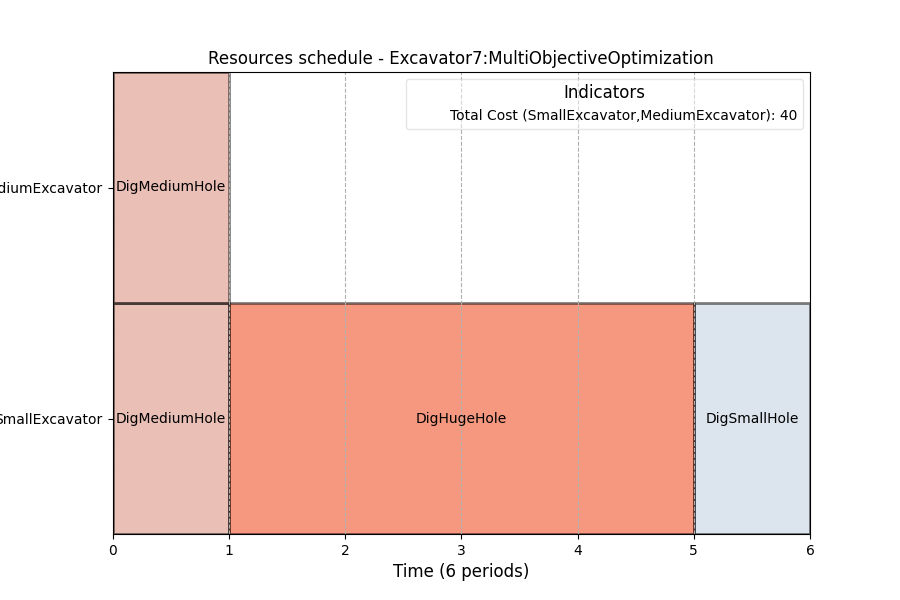

In [6]:
solution = solver.solve()
solution.render_gantt_matplotlib()

Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.01s
MakeSpan Value :  7
MinimizeObjective_4794ecb8 Value :  35


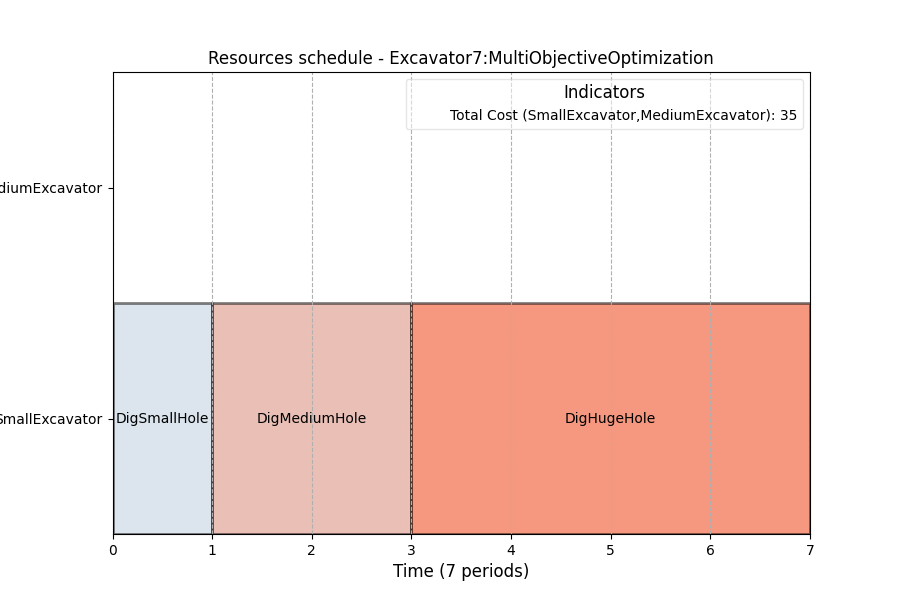

In [7]:
solution = solver.solve()
solution.render_gantt_matplotlib()

In [8]:
solution = solver.solve()
print(solution)

	No solution can be found for problem Excavator7:MultiObjectiveOptimization.
	Reason: Unsatisfiable problem: no solution exists
Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.00s
False
